### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'1.13.1'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(testY[0:5])

[9 2 1 1 6]


In [6]:
testX[0:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [7]:
trainX[0:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [8]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [9]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

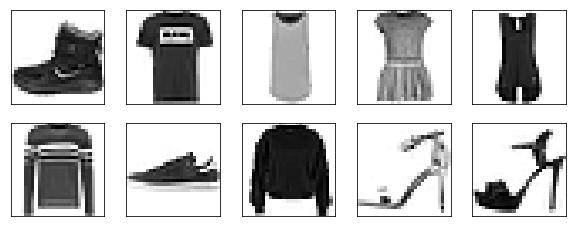

In [10]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [11]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

### Execute the model using model.fit()

In [13]:
model.fit(trainX, trainY, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 2s 31us/sample - loss: 14.5075
Epoch 2/10
60000/60000 [==============================] - 2s 28us/sample - loss: 14.5063
Epoch 3/10
60000/60000 [==============================] - 2s 29us/sample - loss: 14.5063
Epoch 4/10
60000/60000 [==============================] - 2s 30us/sample - loss: 14.5063
Epoch 5/10
60000/60000 [==============================] - 2s 29us/sample - loss: 14.5063
Epoch 6/10
60000/60000 [==============================] - 2s 28us/sample - loss: 14.5063
Epoch 7/10
60000/60000 [==============================] - 2s 26us/sample - loss: 14.5063
Epoch 8/10
60000/60000 [==============================] - 2s 27us/sample - loss: 14.5063
Epoch 9/10
60000/60000 [==============================] - 2s 31us/sample - loss: 14.5063
Epoch 10/10
60000/60000 [==============================] - 2s 39us/sample - loss: 14.5063


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [14]:
model2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 10
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [15]:
#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

In [16]:
#Add OUTPUT layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [17]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model2.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

### Execute the model

In [18]:
model2.fit(trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.5585
Epoch 2/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4851
Epoch 3/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4692
Epoch 4/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4587
Epoch 5/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4540
Epoch 6/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4511
Epoch 7/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4487
Epoch 8/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.4445
Epoch 9/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4439
Epoch 10/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4394


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [19]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model2.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

In [20]:
model2.fit(trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4055
Epoch 2/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4002
Epoch 3/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.4014
Epoch 4/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3999
Epoch 5/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3999
Epoch 6/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3979
Epoch 7/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3990
Epoch 8/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3998
Epoch 9/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3970
Epoch 10/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3993


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [21]:
#Add 1st hidden layer
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))
#Add 2nd hidden layer
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))
#Add 3rd hidden layer
model2.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [22]:
#Add OUTPUT layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [23]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model2.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

## Review model

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [25]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total para

### Run the model

In [26]:
model2.fit(trainX, trainY, epochs=25)

Epoch 1/25
60000/60000 [==============================] - 3s 51us/sample - loss: 2.3044
Epoch 2/25
60000/60000 [==============================] - 3s 43us/sample - loss: 2.2991
Epoch 3/25
60000/60000 [==============================] - 3s 45us/sample - loss: 2.2934
Epoch 4/25
60000/60000 [==============================] - 3s 46us/sample - loss: 2.2759
Epoch 5/25
60000/60000 [==============================] - 3s 48us/sample - loss: 2.1550
Epoch 6/25
60000/60000 [==============================] - 3s 46us/sample - loss: 1.7724
Epoch 7/25
60000/60000 [==============================] - 3s 53us/sample - loss: 1.4859
Epoch 8/25
60000/60000 [==============================] - 4s 59us/sample - loss: 1.1855
Epoch 9/25
60000/60000 [==============================] - 3s 50us/sample - loss: 1.0037
Epoch 10/25
60000/60000 [==============================] - 3s 43us/sample - loss: 0.8736
Epoch 11/25
60000/60000 [==============================] - 3s 46us/sample - loss: 0.7854
Epoch 12/25
60000/60000 [=====